<a href="https://colab.research.google.com/github/hernanhuwae/Pemograman-Python/blob/main/Tugas%20Python%20CNN%20MODEL-11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/DAUNPITON

/content/drive/MyDrive/DAUNPITON


In [2]:
ls

DAUNSAYA/  nnmodel_scene/


In [3]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [4]:
print("[INFO] loading images...")
imagePaths = paths.list_images("DAUNSAYA")
data = []
labels = []

[INFO] loading images...


In [5]:
for imagePath in imagePaths:

	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [6]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [7]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [8]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [9]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [10]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(21, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(21, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))

#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 21)        588       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 21)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 21)        3990      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 21)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4116)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               411700    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [11]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [12]:
H = model1.fit(trainX, trainY, validation_data=(testX,testY), epochs=25,batch_size=30)

Epoch 1/25
15/15 [==============================] - 2s 111ms/step - loss: 1.6726 - accuracy: 0.2169 - val_loss: 1.5922 - val_accuracy: 0.1918
Epoch 2/25
15/15 [==============================] - 2s 115ms/step - loss: 1.5579 - accuracy: 0.3174 - val_loss: 1.5112 - val_accuracy: 0.3904
Epoch 3/25
15/15 [==============================] - 3s 193ms/step - loss: 1.4177 - accuracy: 0.4224 - val_loss: 1.3965 - val_accuracy: 0.3630
Epoch 4/25
15/15 [==============================] - 3s 196ms/step - loss: 1.2601 - accuracy: 0.4817 - val_loss: 1.2281 - val_accuracy: 0.4658
Epoch 5/25
15/15 [==============================] - 2s 130ms/step - loss: 1.1004 - accuracy: 0.5616 - val_loss: 1.0860 - val_accuracy: 0.5137
Epoch 6/25
15/15 [==============================] - 2s 102ms/step - loss: 1.0276 - accuracy: 0.6187 - val_loss: 1.0251 - val_accuracy: 0.5753
Epoch 7/25
15/15 [==============================] - 2s 102ms/step - loss: 0.9588 - accuracy: 0.6279 - val_loss: 1.0077 - val_accuracy: 0.5685
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


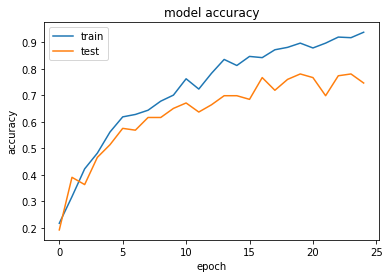

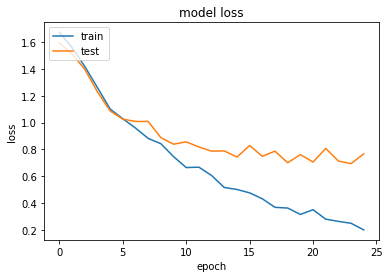

In [13]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.62      0.54      0.58        28
      GMB_02       0.73      0.73      0.73        26
      GMB_03       0.92      0.76      0.83        29
      GMB_04       0.72      0.79      0.75        33
      GMB_05       0.75      0.90      0.82        30

    accuracy                           0.75       146
   macro avg       0.75      0.74      0.74       146
weighted avg       0.75      0.75      0.74       146

